## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [21]:
from keras.layers import BatchNormalization

def build_mlp(input_shape, output_units=10, num_neurons=[512,256,128], batch_normal=1):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            if batch_normal == 0:
                x = BatchNormalization()(input_layer)
                x = keras.layers.Dense(units=n_units, activation='relu', name='hidden_layer'+str(i+1))(x)
            else:
                x = keras.layers.Dense(units=n_units, activation='relu', name='hidden_layer'+str(i+1))(input_layer)
        else:
            if batch_normal == 0:
                x = BatchNormalization()(x)
            x = keras.layers.Dense(units=n_units, activation='relu', name='hidden_layer'+str(i+1))(x)
          
        if batch_normal == 1:
            x = BatchNormalization()(x)
        
    out = keras.layers.Dense(units=output_units, activation='softmax', name='output')(x)
    model = keras.models.Model(inputs=[input_layer], output=[out])
    return model

In [22]:
"""Code Here
設定超參數
"""
BATCH_SIZE=[2, 16, 32, 128, 256]
LR=1e-3
EPOCHS=10
BATCH_NORMALIZATION=[1,0]

BATCH_NORMALIZATION=1, BATCH_SIZE=2


D:\tool\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=[<tf.Tenso...)`


Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 391s 8ms/step - loss: 2.3001 - accuracy: 0.1519 - val_loss: 2.2313 - val_accuracy: 0.1858
Epoch 2/10
50000/50000 [==============================] - 393s 8ms/step - loss: 2.2389 - accuracy: 0.1646 - val_loss: 2.2242 - val_accuracy: 0.2090
Epoch 3/10
50000/50000 [==============================] - 378s 8ms/step - loss: 2.2305 - accuracy: 0.1708 - val_loss: 2.2990 - val_accuracy: 0.1822
Epoch 4/10
50000/50000 [==============================] - 368s 7ms/step - loss: 2.2309 - accuracy: 0.1664 - val_loss: 2.1902 - val_accuracy: 0.1867
Epoch 5/10
50000/50000 [==============================] - 369s 7ms/step - loss: 2.2353 - accuracy: 0.1651 - val_loss: 2.9726 - val_accuracy: 0.1683
Epoch 6/10
50000/50000 [==============================] - 539s 11ms/step - loss: 2.2361 - accuracy: 0.1679 - val_loss: 3.2432 - val_accuracy: 0.1851
Epoch 7/10
50000/50000 [==============================] - 552

D:\tool\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=[<tf.Tenso...)`


Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 71s 1ms/step - loss: 1.8005 - accuracy: 0.3603 - val_loss: 1.6411 - val_accuracy: 0.4122
Epoch 2/10
50000/50000 [==============================] - 70s 1ms/step - loss: 1.6362 - accuracy: 0.4164 - val_loss: 1.5798 - val_accuracy: 0.4397
Epoch 3/10
50000/50000 [==============================] - 69s 1ms/step - loss: 1.5872 - accuracy: 0.4351 - val_loss: 1.5097 - val_accuracy: 0.4605
Epoch 4/10
50000/50000 [==============================] - 69s 1ms/step - loss: 1.5452 - accuracy: 0.4498 - val_loss: 1.5098 - val_accuracy: 0.4558
Epoch 5/10
50000/50000 [==============================] - 70s 1ms/step - loss: 1.5271 - accuracy: 0.4582 - val_loss: 1.5588 - val_accuracy: 0.4530
Epoch 6/10
50000/50000 [==============================] - 71s 1ms/step - loss: 1.5012 - accuracy: 0.4656 - val_loss: 1.4952 - val_accuracy: 0.4678
Epoch 7/10
50000/50000 [==============================] - 70s 1ms/st

D:\tool\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=[<tf.Tenso...)`


Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 37s 748us/step - loss: 1.7346 - accuracy: 0.3860 - val_loss: 1.5928 - val_accuracy: 0.4332
Epoch 2/10
50000/50000 [==============================] - 36s 725us/step - loss: 1.5447 - accuracy: 0.4489 - val_loss: 1.5344 - val_accuracy: 0.4523
Epoch 3/10
50000/50000 [==============================] - 36s 727us/step - loss: 1.4667 - accuracy: 0.4778 - val_loss: 1.5558 - val_accuracy: 0.4459
Epoch 4/10
50000/50000 [==============================] - 36s 728us/step - loss: 1.4220 - accuracy: 0.4937 - val_loss: 1.5190 - val_accuracy: 0.4585
Epoch 5/10
50000/50000 [==============================] - 36s 726us/step - loss: 1.3867 - accuracy: 0.5089 - val_loss: 1.5085 - val_accuracy: 0.4624
Epoch 6/10
50000/50000 [==============================] - 38s 754us/step - loss: 1.3479 - accuracy: 0.5222 - val_loss: 1.5251 - val_accuracy: 0.4563
Epoch 7/10
50000/50000 [==============================] 

D:\tool\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=[<tf.Tenso...)`


Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 15s 308us/step - loss: 1.7598 - accuracy: 0.3882 - val_loss: 1.6456 - val_accuracy: 0.4157
Epoch 2/10
50000/50000 [==============================] - 14s 288us/step - loss: 1.4934 - accuracy: 0.4754 - val_loss: 1.6886 - val_accuracy: 0.4132
Epoch 3/10
50000/50000 [==============================] - 14s 290us/step - loss: 1.3986 - accuracy: 0.5080 - val_loss: 1.5527 - val_accuracy: 0.4494
Epoch 4/10
50000/50000 [==============================] - 15s 293us/step - loss: 1.3289 - accuracy: 0.5327 - val_loss: 1.5306 - val_accuracy: 0.4629
Epoch 5/10
50000/50000 [==============================] - 15s 297us/step - loss: 1.2680 - accuracy: 0.5555 - val_loss: 1.5759 - val_accuracy: 0.4448
Epoch 6/10
50000/50000 [==============================] - 15s 297us/step - loss: 1.2157 - accuracy: 0.5724 - val_loss: 1.4966 - val_accuracy: 0.4691
Epoch 7/10
50000/50000 [==============================] 

D:\tool\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=[<tf.Tenso...)`


Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 12s 234us/step - loss: 1.8587 - accuracy: 0.3641 - val_loss: 1.7651 - val_accuracy: 0.3872
Epoch 2/10
50000/50000 [==============================] - 10s 208us/step - loss: 1.5372 - accuracy: 0.4603 - val_loss: 1.5776 - val_accuracy: 0.4402
Epoch 3/10
50000/50000 [==============================] - 10s 204us/step - loss: 1.4319 - accuracy: 0.4993 - val_loss: 1.5440 - val_accuracy: 0.4591
Epoch 4/10
50000/50000 [==============================] - 10s 204us/step - loss: 1.3631 - accuracy: 0.5225 - val_loss: 1.5064 - val_accuracy: 0.4726
Epoch 5/10
50000/50000 [==============================] - 10s 204us/step - loss: 1.3011 - accuracy: 0.5425 - val_loss: 1.4872 - val_accuracy: 0.4817
Epoch 6/10
50000/50000 [==============================] - 10s 206us/step - loss: 1.2505 - accuracy: 0.5634 - val_loss: 1.5075 - val_accuracy: 0.4639
Epoch 7/10
50000/50000 [==============================] 

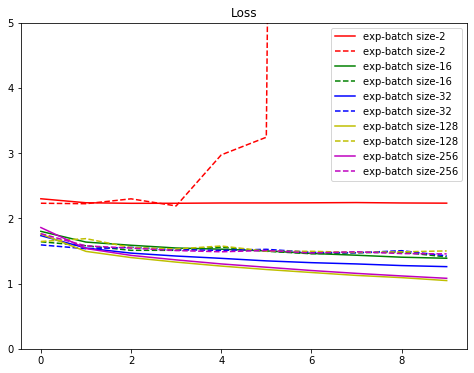

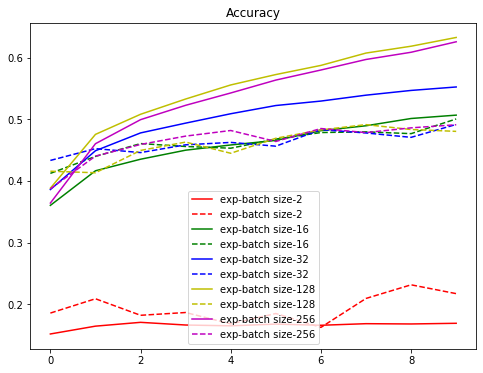

BATCH_NORMALIZATION=0, BATCH_SIZE=2


D:\tool\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=[<tf.Tenso...)`


Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 685s 14ms/step - loss: 2.2577 - accuracy: 0.1641 - val_loss: 2.1752 - val_accuracy: 0.1985
Epoch 2/10
50000/50000 [==============================] - 721s 14ms/step - loss: 2.2238 - accuracy: 0.1753 - val_loss: 2.1649 - val_accuracy: 0.2200
Epoch 3/10
50000/50000 [==============================] - 988s 20ms/step - loss: 2.2218 - accuracy: 0.1784 - val_loss: 2.1791 - val_accuracy: 0.1825
Epoch 4/10
50000/50000 [==============================] - 1081s 22ms/step - loss: 2.2081 - accuracy: 0.1820 - val_loss: 2.1351 - val_accuracy: 0.2204
Epoch 5/10
50000/50000 [==============================] - 1121s 22ms/step - loss: 2.2022 - accuracy: 0.1875 - val_loss: 2.1435 - val_accuracy: 0.2066
Epoch 6/10
50000/50000 [==============================] - 1180s 24ms/step - loss: 2.1906 - accuracy: 0.1957 - val_loss: 2.2041 - val_accuracy: 0.2070
Epoch 7/10
50000/50000 [=============================

D:\tool\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=[<tf.Tenso...)`


Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 136s 3ms/step - loss: 1.7344 - accuracy: 0.3793 - val_loss: 1.5147 - val_accuracy: 0.4542
Epoch 2/10
50000/50000 [==============================] - 134s 3ms/step - loss: 1.5355 - accuracy: 0.4538 - val_loss: 1.4068 - val_accuracy: 0.4967
Epoch 3/10
50000/50000 [==============================] - 134s 3ms/step - loss: 1.4489 - accuracy: 0.4818 - val_loss: 1.4018 - val_accuracy: 0.5014
Epoch 4/10
50000/50000 [==============================] - 132s 3ms/step - loss: 1.3894 - accuracy: 0.5052 - val_loss: 1.3671 - val_accuracy: 0.5105
Epoch 5/10
50000/50000 [==============================] - 134s 3ms/step - loss: 1.3387 - accuracy: 0.5219 - val_loss: 1.3499 - val_accuracy: 0.5249
Epoch 6/10
50000/50000 [==============================] - 134s 3ms/step - loss: 1.2970 - accuracy: 0.5394 - val_loss: 1.3126 - val_accuracy: 0.5356
Epoch 7/10
50000/50000 [==============================] - 134s

D:\tool\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=[<tf.Tenso...)`


Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 76s 2ms/step - loss: 1.6782 - accuracy: 0.4051 - val_loss: 1.4684 - val_accuracy: 0.4812
Epoch 2/10
50000/50000 [==============================] - 74s 1ms/step - loss: 1.4440 - accuracy: 0.4862 - val_loss: 1.3851 - val_accuracy: 0.5024
Epoch 3/10
50000/50000 [==============================] - 74s 1ms/step - loss: 1.3399 - accuracy: 0.5257 - val_loss: 1.3605 - val_accuracy: 0.5128
Epoch 4/10
50000/50000 [==============================] - 71s 1ms/step - loss: 1.2648 - accuracy: 0.5495 - val_loss: 1.3180 - val_accuracy: 0.5344
Epoch 5/10
50000/50000 [==============================] - 74s 1ms/step - loss: 1.2004 - accuracy: 0.5743 - val_loss: 1.3173 - val_accuracy: 0.5312
Epoch 6/10
50000/50000 [==============================] - 74s 1ms/step - loss: 1.1431 - accuracy: 0.5944 - val_loss: 1.3063 - val_accuracy: 0.5334
Epoch 7/10
50000/50000 [==============================] - 74s 1ms/st

D:\tool\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=[<tf.Tenso...)`


Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 32s 635us/step - loss: 1.7310 - accuracy: 0.3889 - val_loss: 1.5415 - val_accuracy: 0.4542
Epoch 2/10
50000/50000 [==============================] - 19s 371us/step - loss: 1.4324 - accuracy: 0.4937 - val_loss: 1.4509 - val_accuracy: 0.4822
Epoch 3/10
50000/50000 [==============================] - 18s 369us/step - loss: 1.3108 - accuracy: 0.5394 - val_loss: 1.4045 - val_accuracy: 0.4932
Epoch 4/10
50000/50000 [==============================] - 18s 369us/step - loss: 1.2156 - accuracy: 0.5746 - val_loss: 1.3722 - val_accuracy: 0.5123
Epoch 5/10
50000/50000 [==============================] - 19s 371us/step - loss: 1.1324 - accuracy: 0.6033 - val_loss: 1.3646 - val_accuracy: 0.5115
Epoch 6/10
50000/50000 [==============================] - 19s 370us/step - loss: 1.0624 - accuracy: 0.6269 - val_loss: 1.3767 - val_accuracy: 0.5179
Epoch 7/10
50000/50000 [==============================] 

D:\tool\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=[<tf.Tenso...)`


Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 14s 281us/step - loss: 1.8343 - accuracy: 0.3557 - val_loss: 1.7729 - val_accuracy: 0.3744
Epoch 2/10
50000/50000 [==============================] - 13s 268us/step - loss: 1.5129 - accuracy: 0.4662 - val_loss: 1.5331 - val_accuracy: 0.4628
Epoch 3/10
50000/50000 [==============================] - 13s 268us/step - loss: 1.3920 - accuracy: 0.5097 - val_loss: 1.4615 - val_accuracy: 0.4787
Epoch 4/10
50000/50000 [==============================] - 13s 268us/step - loss: 1.3023 - accuracy: 0.5443 - val_loss: 1.4390 - val_accuracy: 0.4882
Epoch 5/10
50000/50000 [==============================] - 13s 269us/step - loss: 1.2275 - accuracy: 0.5713 - val_loss: 1.4141 - val_accuracy: 0.4953
Epoch 6/10
50000/50000 [==============================] - 13s 268us/step - loss: 1.1599 - accuracy: 0.5978 - val_loss: 1.3993 - val_accuracy: 0.5012
Epoch 7/10
50000/50000 [==============================] 

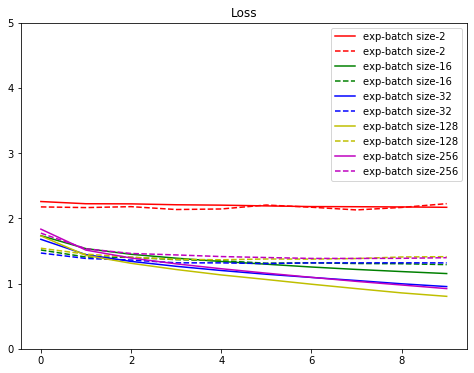

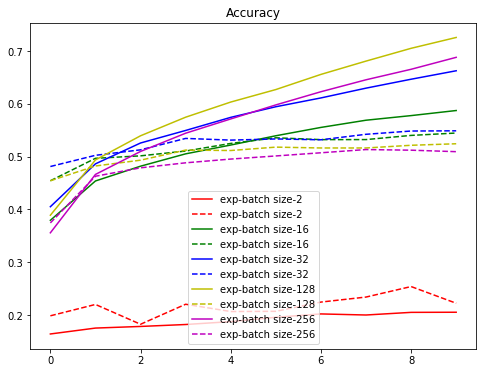

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for bn in BATCH_NORMALIZATION:
    for bs in BATCH_SIZE:
        print('BATCH_NORMALIZATION=%s, BATCH_SIZE=%s'%(str(bn),str(bs)))
        model = build_mlp(x_train.shape[1:], batch_normal=bn)
        opt = keras.optimizers.SGD(lr=LR, nesterov=True, momentum=.95)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=opt)
        model.fit(x_train, y_train, epochs=EPOCHS, batch_size=bs, validation_data=[x_test, y_test], shuffle=True)
        
        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["accuracy"]
        valid_acc = model.history.history["val_accuracy"]
        exp_name_tag = "exp-batch size-%s" % str(bs)
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}   
    
    # 將結果繪出
    color_bar = ["r", "g", "b", "y", "m", "k"]

    plt.figure(figsize=(8,6))
    for i, cond in enumerate(results.keys()):
        plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
        plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
    plt.title("Loss")
    plt.ylim([0, 5])
    plt.legend()
    plt.show()

    plt.figure(figsize=(8,6))
    for i, cond in enumerate(results.keys()):
        plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
        plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
    plt.title("Accuracy")
    plt.legend()
    plt.show()

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""